# Blood Glucose - Body Event - Body Health

## Library

In [20]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [21]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/events/blood_glucose.json') as file:
    data = json.load(file)

## Event

Event date: December 29, 2023 at 01:07



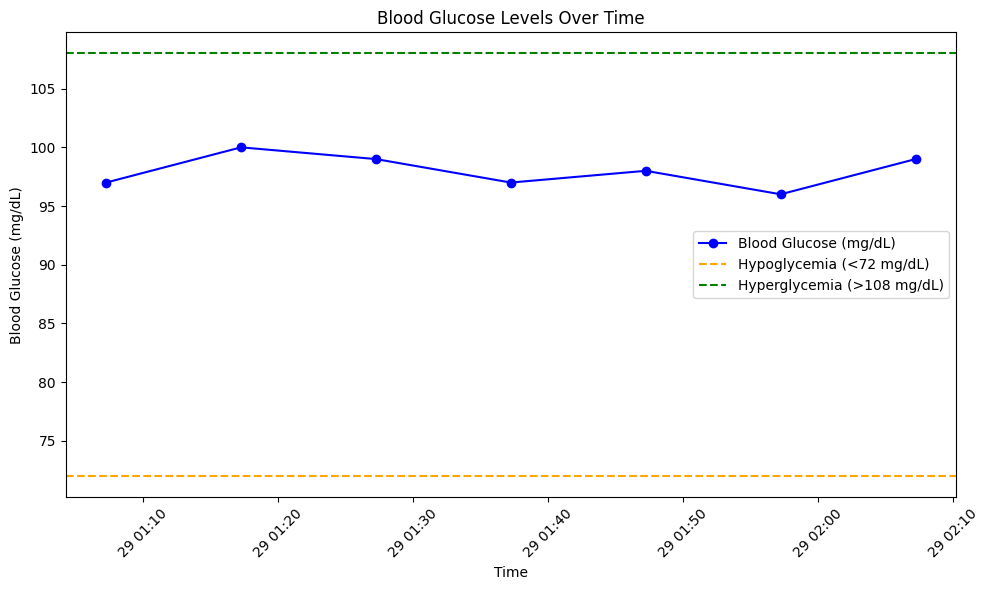

Blood Glucose Average: 98 mg/dL 
Min Blood Glucose: 96 mg/dL
Max Blood Glucose: 100 mg/dL


In [25]:
# Extract Blood Glucose
blood_glucose_avg = data['body_health']['events']['blood_glucose_event']['blood_glucose']['blood_glucose_avg_mg_per_dL_int']
blood_glucose_granular = data['body_health']['events']['blood_glucose_event']['blood_glucose']['blood_glucose_granular_data_array']
original_date = data['body_health']['events']['blood_glucose_event']['metadata']['datetime_string']


def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)
print(f"Event date: {translated_date}\n")

# Check if there is data in blood_glucose_granular_data_array
if blood_glucose_granular:
    # Convert data to a DataFrame
    blood_glucose_granular_df = pd.DataFrame(blood_glucose_granular)
    blood_glucose_granular_df['datetime'] = pd.to_datetime(blood_glucose_granular_df['datetime_string'])

    # Create the chart
    plt.figure(figsize=(10, 6))
    plt.plot(blood_glucose_granular_df['datetime'], blood_glucose_granular_df['blood_glucose_mg_per_dL_int'], marker='o', color='b', label='Blood Glucose (mg/dL)')

    # Add the glucose level lines
    plt.axhline(y=72, color='orange', linestyle='--', label='Hypoglycemia (<72 mg/dL)')
    plt.axhline(y=108, color='green', linestyle='--', label='Hyperglycemia (>108 mg/dL)')

    # Setting up labels and title
    plt.title('Blood Glucose Levels Over Time')
    plt.xlabel('Time')
    plt.ylabel('Blood Glucose (mg/dL)')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the graphic
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Blood Glucose Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# Check Blood Glucose Average
if not blood_glucose_avg and not blood_glucose_granular:
    blood_glucose_avg_result = "Blood Glucose Average: No values ​​were obtained or it is null."

elif not blood_glucose_avg:
    blood_glucose_avg_granular = blood_glucose_granular_df['blood_glucose_mg_per_dL_int'].mean()
    blood_glucose_avg_result = f"Blood Glucose Average: {blood_glucose_avg_granular} mg/dL "

else:
    blood_glucose_avg_result = f"Blood Glucose Average: {blood_glucose_avg} mg/dL "
    
# Get the minimum and maximum glucose values ​​of the DataFrame
if blood_glucose_granular:
    min_glucose = blood_glucose_granular_df['blood_glucose_mg_per_dL_int'].min()
    min_glucose_result = f"Min Blood Glucose: {min_glucose} mg/dL"
    max_glucose = blood_glucose_granular_df['blood_glucose_mg_per_dL_int'].max()
    max_glucose_result = f"Max Blood Glucose: {max_glucose} mg/dL"
else:
    min_glucose_result = 'Min Blood Glucose: No values ​​were obtained or it is null.'
    max_glucose_result = 'Max Blood Glucose: No values ​​were obtained or it is null.'

print(blood_glucose_avg_result)
print(min_glucose_result)
print(max_glucose_result)